In [1]:
import bibtexparser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import networkx as nx

In [2]:
# Charger le fichier BibTeX
with open('IEEE Xplore Citation BibTeX Download 2024.6.23.8.12.52.bib', 'r', encoding='utf-8') as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

In [3]:
# Convertir en DataFrame
df = pd.DataFrame(bib_database.entries)

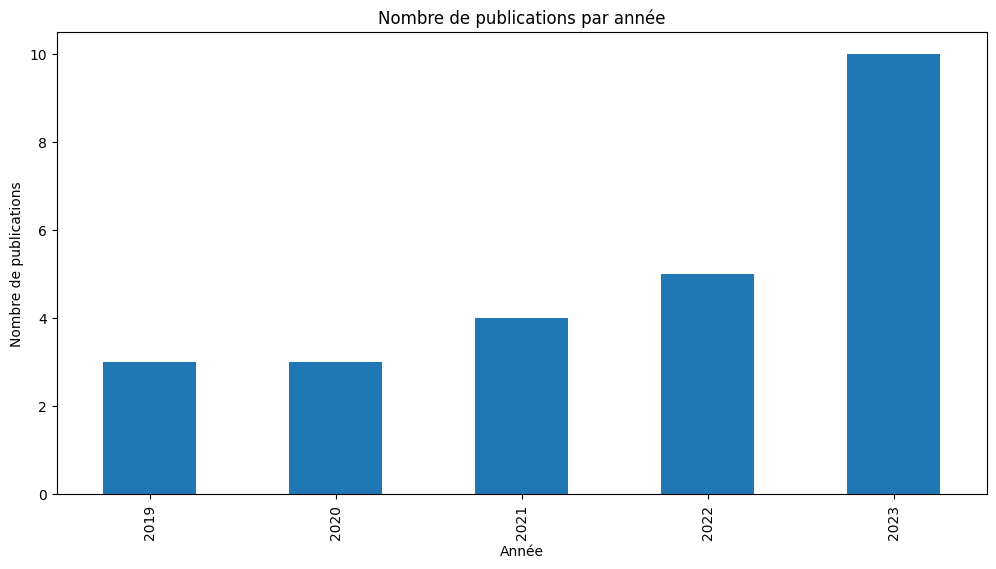

In [4]:
# 1. Analyse temporelle
df['year'] = pd.to_numeric(df['year'])
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar')
plt.title('Nombre de publications par année')
plt.xlabel('Année')
plt.ylabel('Nombre de publications')
plt.show()

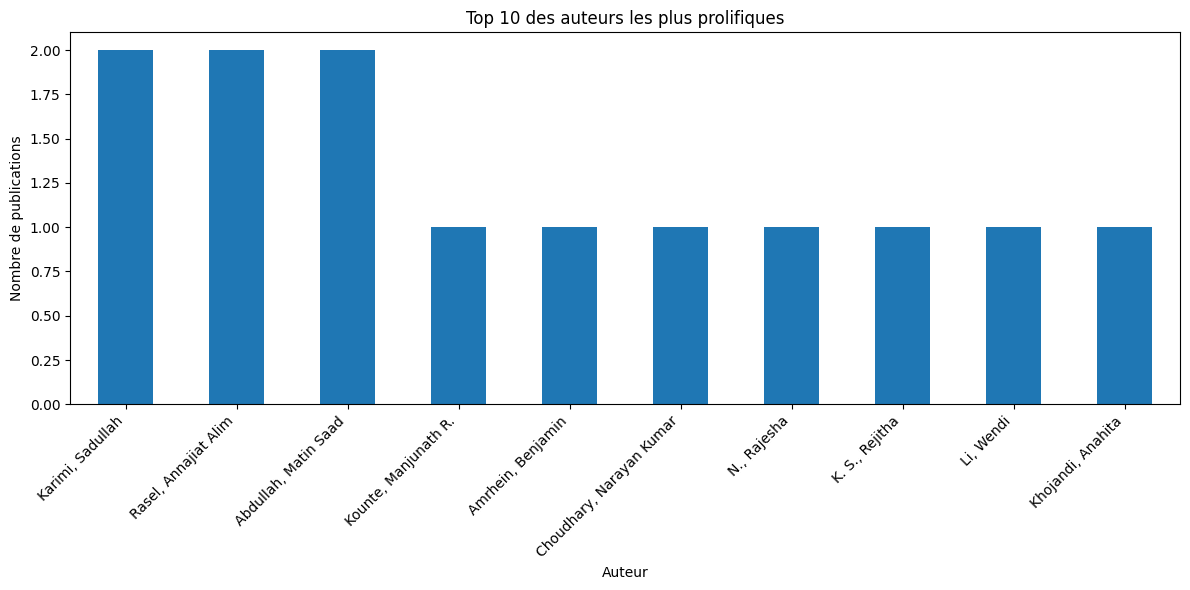

In [5]:
# 2. Auteurs les plus prolifiques
authors = df['author'].str.split(' and ', expand=True).stack()
author_counts = authors.value_counts().head(10)
plt.figure(figsize=(12, 6))
author_counts.plot(kind='bar')
plt.title('Top 10 des auteurs les plus prolifiques')
plt.xlabel('Auteur')
plt.ylabel('Nombre de publications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

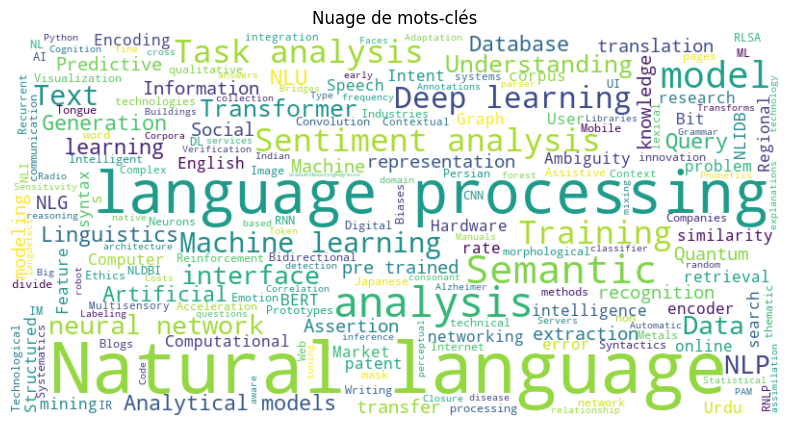

In [6]:
# 3. Nuage de mots-clés
all_keywords = ' '.join(df['keywords'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots-clés')
plt.show()

In [7]:
# 4. Analyse des co-auteurs
def get_coauthor_pairs(authors_string):
    authors = authors_string.split(' and ')
    return [(a1, a2) for i, a1 in enumerate(authors) for a2 in authors[i+1:]]

In [8]:
coauthor_pairs = df['author'].apply(get_coauthor_pairs).sum()
G = nx.Graph()
G.add_edges_from(coauthor_pairs)

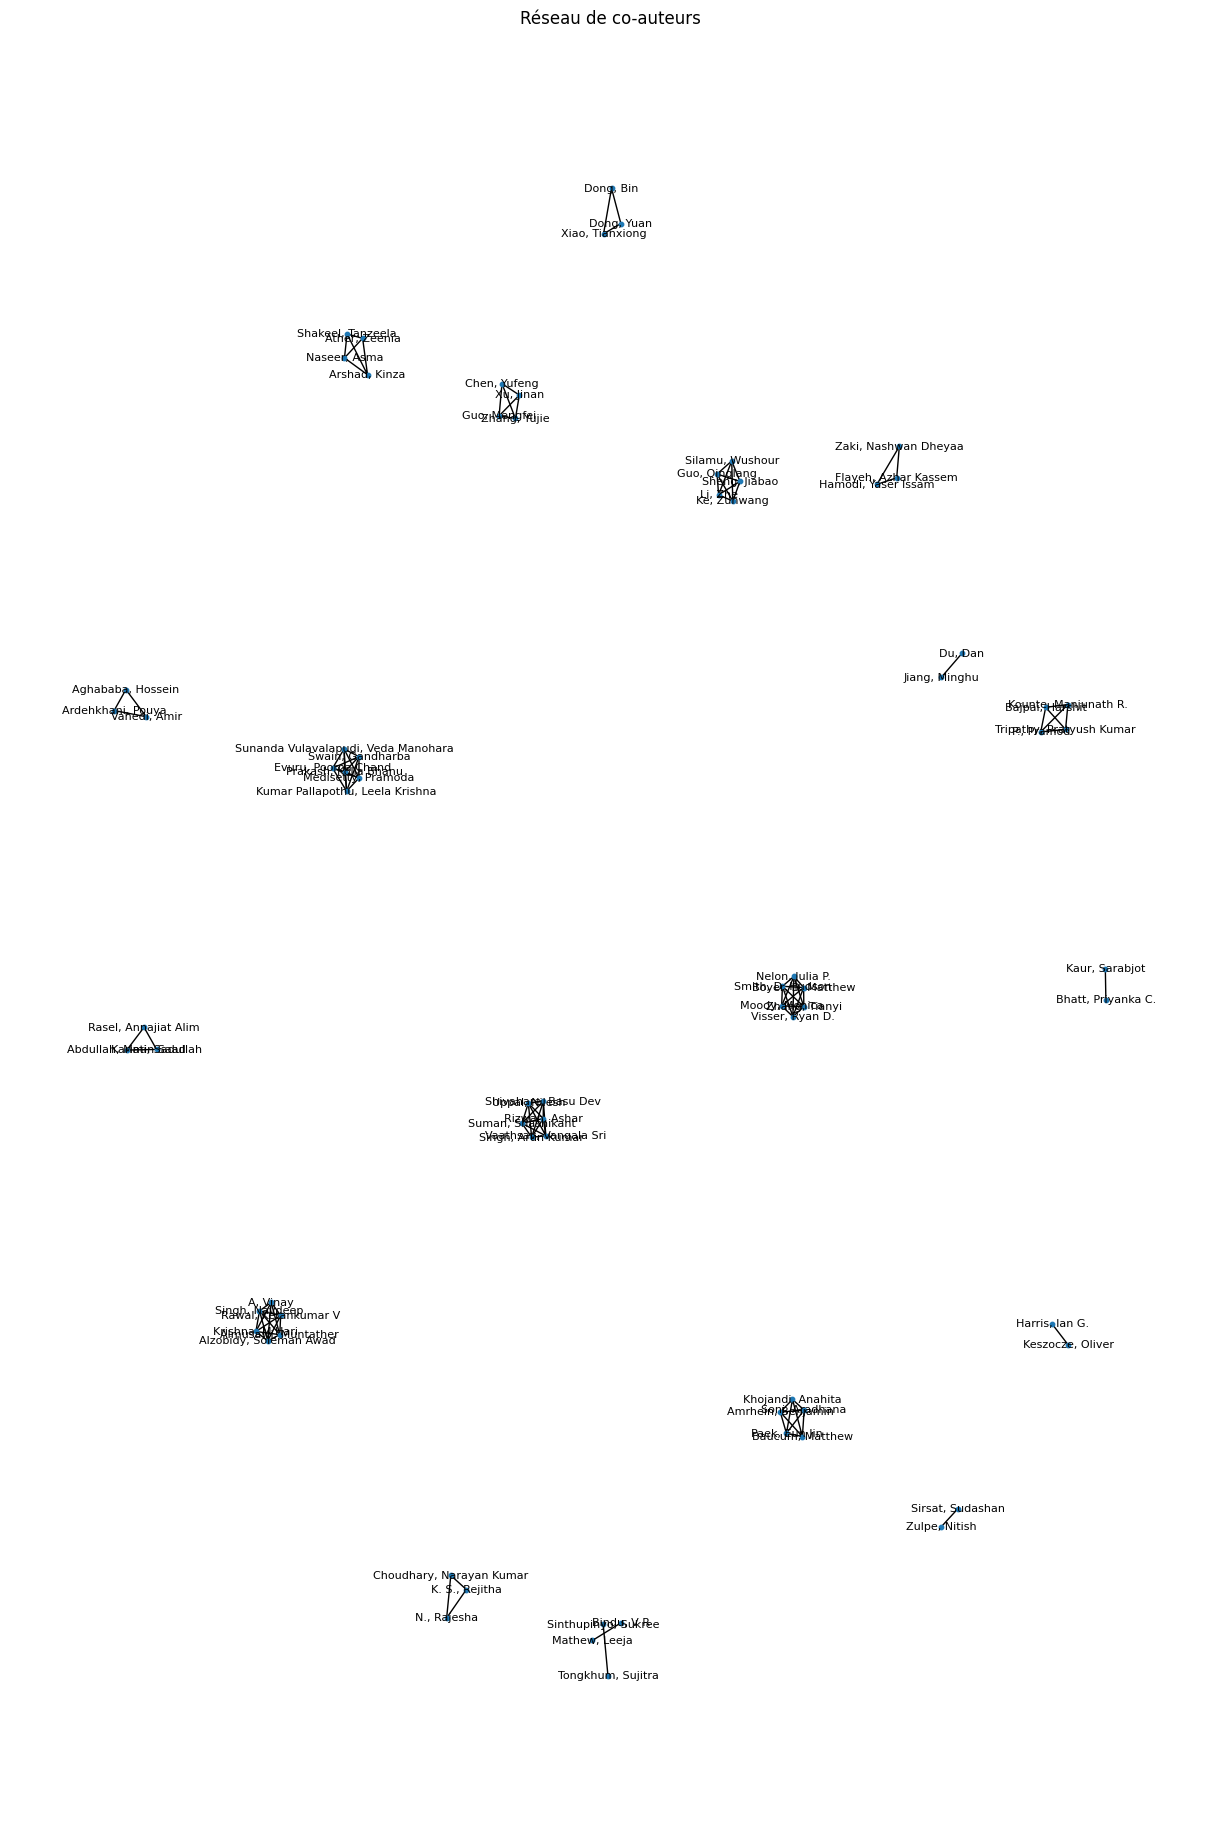

In [9]:
plt.figure(figsize=(12, 18))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=10, font_size=8)
plt.title('Réseau de co-auteurs')
plt.show()

In [10]:
# 5. Analyse des citations (si disponible)
if 'citations' in df.columns:
    df['citations'] = pd.to_numeric(df['citations'])
    plt.figure(figsize=(12, 6))
    sns.histplot(df['citations'], kde=True)
    plt.title('Distribution des citations')
    plt.xlabel('Nombre de citations')
    plt.ylabel('Fréquence')
    plt.show()

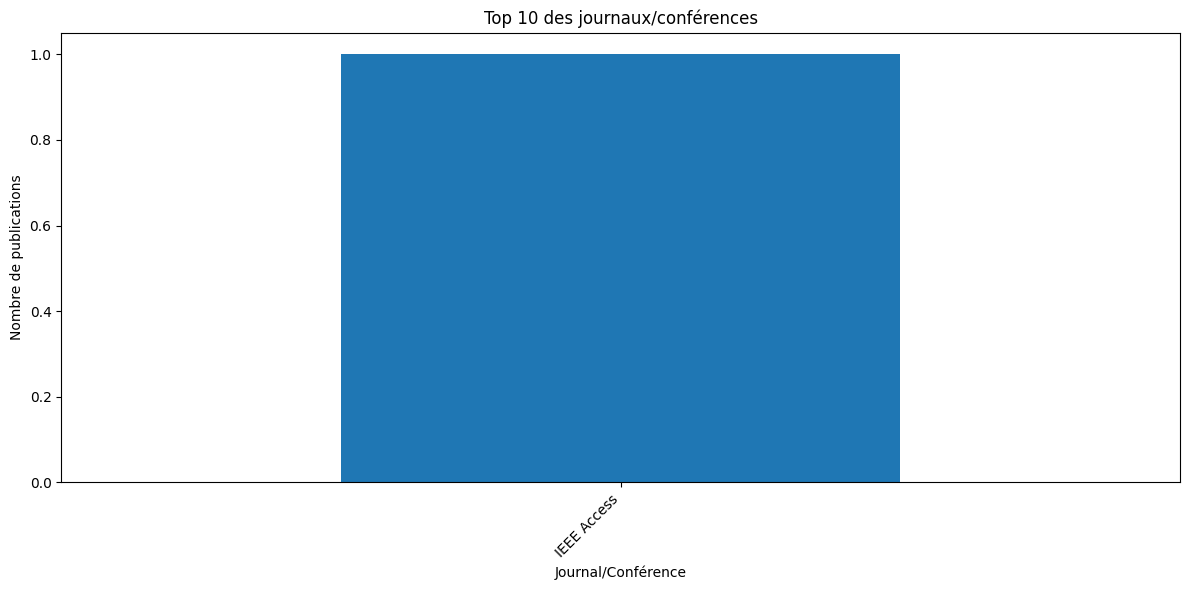

In [11]:
# 6. Journaux/Conférences les plus fréquents
venue_counts = df['journal'].value_counts().head(10)
plt.figure(figsize=(12, 6))
venue_counts.plot(kind='bar')
plt.title('Top 10 des journaux/conférences')
plt.xlabel('Journal/Conférence')
plt.ylabel('Nombre de publications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()